# **I'm diving into the CIFAR-10 dataset – a classic playground for deep learning experiments! 🧠💥 It's simple, structured, and just right for getting hands-on.**

This vibrant dataset packs a punch with 60,000 colorful 32x32 images spread across 10 categories, with 6,000 images per class. Here's the breakdown:

**📦 Training Set: 50,000 images, split into 5 batches of 10,000 each.**

**🧪 Test Set: 10,000 images, with 1,000 carefully selected samples from each class.**

While the test batch keeps things balanced, the training batches shuffle things up a bit – each still holding exactly 5,000 images per class overall.

Perfect for exploring, experimenting, and unlocking new insights. Let’s see what these tiny images can teach us! 🔍🎨

# **Fastai vs PyTorch: Who Wears the CIFAR-10 Crown? 🏆 A Deep Dive into Speed, Simplicity, and Performance**

In [1]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor


In [2]:
from fastai.vision.all import *

URLs.CIFAR:

This is a built-in reference in Fastai that points to the download link for the CIFAR-10 dataset.

Fastai provides easy access to popular datasets through the URLs module.

So, URLs.CIFAR is a shortcut to the dataset’s URL – you don’t need to copy-paste any link manually.

In [3]:
path = untar_data(URLs.CIFAR)

# Another one concept in Fastai is DataBlock

Fastai tries to make deep learning workflows modular and flexible, and **DataBlock is the blueprint for:**

*Where to get the data from*

*How to label it*

*How to split it (train/valid)*

*What transforms to apply (e.g., resizing, augmenting)*

*How to convert it into tensors*


But here :
The CIFAR-10 dataset is:

Already pre-labeled (images are stored with their class labels).

Balanced (each class has the same number of images).

Structured into training and test sets.

Images are already in uniform 32x32 RGB format — no resizing or reformatting needed.

So no need of DataBlock

In [4]:
# Load the DataLoaders
dls = ImageDataLoaders.from_folder(
    path, train='train', valid='test',
    item_tfms=Resize(224), bs=64)


**✅ vision_learner(...)**



*   The Model
*   The optimizer
*   The Loss Function
*   The training Logic
*   Metric Logic
*   Even the ability to fine-tune pretrained models


In [5]:
learn = vision_learner(dls, resnet18, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


In [6]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.589909,0.468076,0.838900,02:27


epoch,train_loss,valid_loss,accuracy,time
0,0.294621,0.248515,0.913800,02:51
1,0.179178,0.251800,0.917900,02:53
2,0.083128,0.213109,0.937500,02:52
3,0.022025,0.207264,0.944500,02:50
4,0.007585,0.204405,0.946100,02:52


In [7]:
# Evaluate
acc = learn.validate()[1]
print(f"Final Accuracy: {acc:.4f}")

Final Accuracy: 0.9461


**Actually We can see, Only 7 lines of code**

In [ ]:

# fastai_cifar10.py
from fastai.vision.all import *

path = untar_data(URLs.CIFAR)

# Load the DataLoaders
dls = ImageDataLoaders.from_folder(
    path, train='train', valid='test',
    item_tfms=Resize(224), bs=64)

# Define and train the learner
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

# Evaluate
acc = learn.validate()[1]
print(f"Final Accuracy: {acc:.4f}")

Visualisation of Confusion matrix

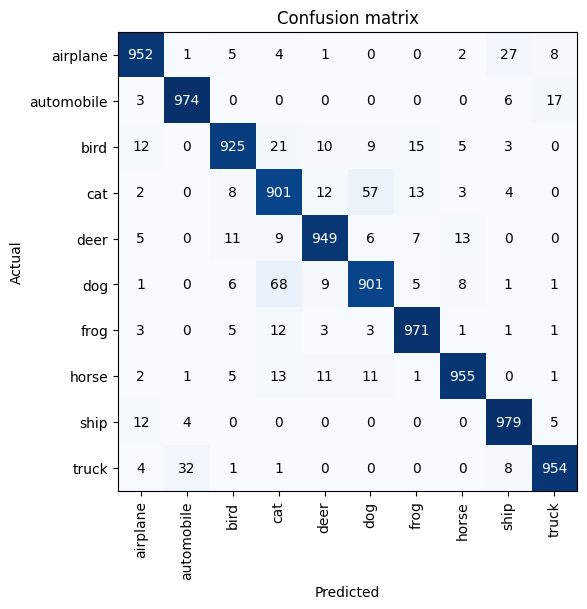

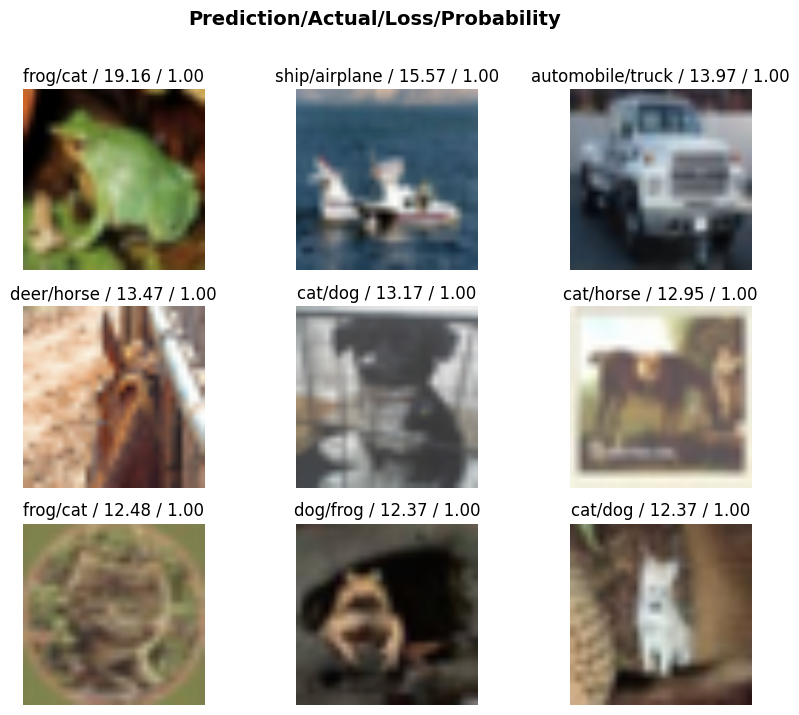

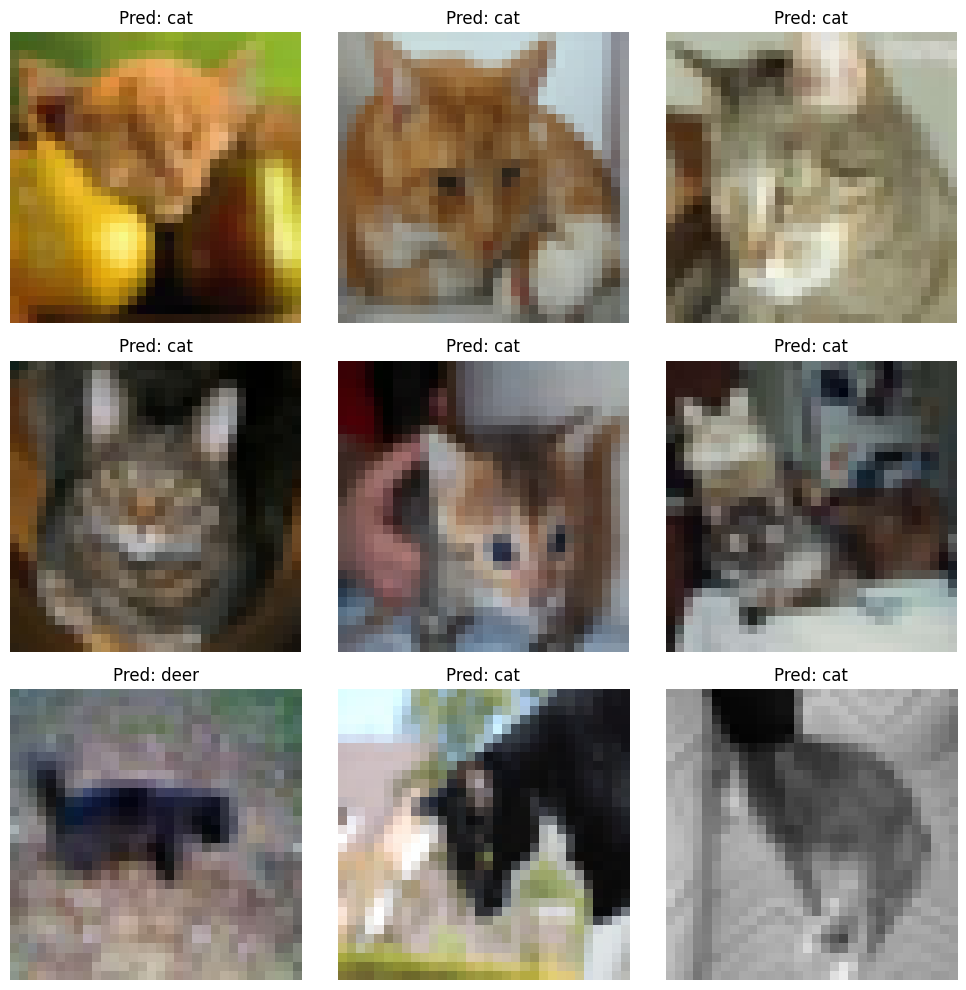

In [8]:
# --- Confusion Matrix ---
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,6), dpi=100)

# Optional: Save the plot
plt.savefig("confusion_matrix.png")

# --- Top Losses (bad predictions) ---
interp.plot_top_losses(9, nrows=3, figsize=(10,8))
plt.savefig("top_losses.png")

# --- Sample Predictions ---
dl = dls.test_dl(get_image_files(path/'test')[:9])
preds, _ = learn.get_preds(dl=dl)
labels = preds.argmax(dim=1)

# Plot sample predictions
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    img = PILImage.create(get_image_files(path/'test')[i])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Pred: {dls.vocab[labels[i]]}")
plt.tight_layout()
plt.savefig("sample_predictions.png")

#Comparing PyTorch From Scratch

In [9]:
# pytorch_cifar10.py
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import time

# Dataset + transforms
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a model (ResNet18)
from torchvision.models import resnet18
model = resnet18(pretrained=False, num_classes=10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
start = time.time()
for epoch in range(5):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.3f}")
end = time.time()

# Accuracy
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')
print(f"Training time: {end - start:.2f}s")


100%|██████████| 170M/170M [00:13<00:00, 12.8MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1070.294
Epoch 2, Loss: 641.556
Epoch 3, Loss: 475.734
Epoch 4, Loss: 376.103
Epoch 5, Loss: 301.633
Accuracy: 82.30%
Training time: 1026.74s


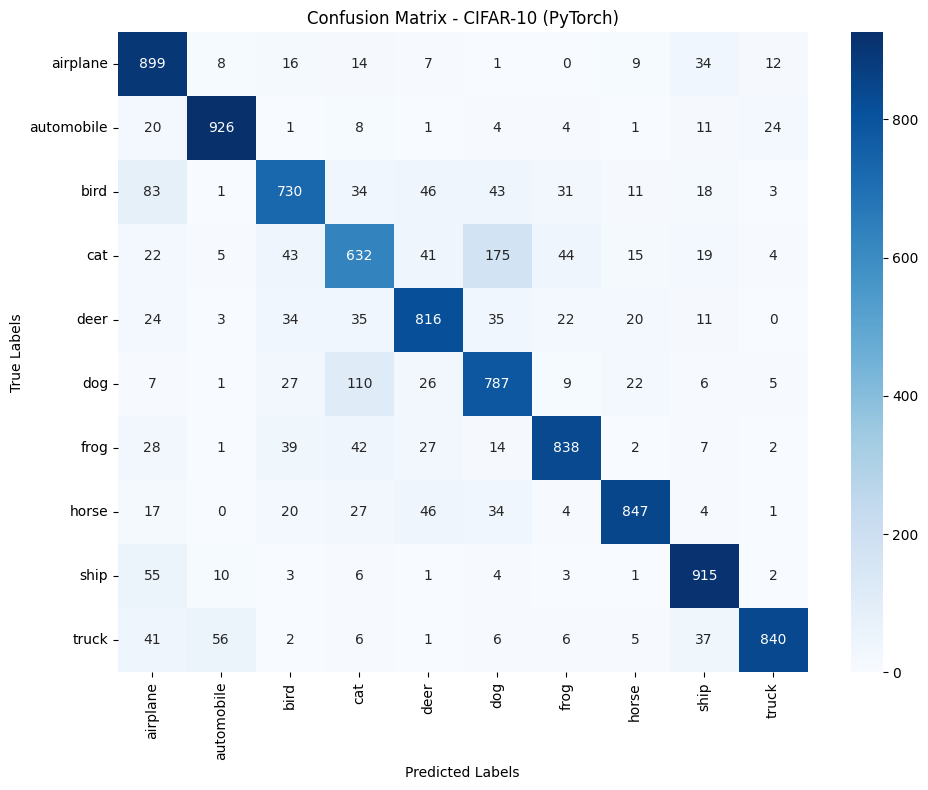

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gather all predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
classes = trainset.classes  # CIFAR-10 class names

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CIFAR-10 (PyTorch)')
plt.tight_layout()
plt.savefig("confusion_matrix_pytorch.png")
plt.show()
